<a href="https://colab.research.google.com/github/eel-eel-eel/ric1340/blob/main/ch07_02_imbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 環境構築
(本章のコードは5章のものをベースとしています)
※2023/04のGoogle colaboratoryのPython3.10へのアップデートに伴い、使用するライブラリを変更したため、コードを大幅に修正

Google Driveをマウント
（データセットや学習済みモデルを格納する）

パスワードを求められた場合はリンクをクリックし、Googleアカウントにログインして表示された文字列を入力する。

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers[ja]==4.29.1 datasets==2.12.0 evaluate==0.4.0
!pip install --upgrade accelerate==0.19.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 86.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.9/599.9 kB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 78.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 92.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━

In [ ]:
import torch
print(torch.cuda.is_available())

True


## データセットの前処理

データセット（livedoor ニュースコーパス）のダウンロード

In [ ]:
!mkdir -p /content/drive/MyDrive/bert/5_1_livedoor_news

In [ ]:
cd /content/drive/MyDrive/bert/5_1_livedoor_news

/content/drive/MyDrive/bert/5_1_livedoor_news


In [ ]:
import urllib.request

dataset_url = "https://www.rondhuit.com/download/ldcc-20140209.tar.gz"
urllib.request.urlretrieve(dataset_url, "ldcc-20140209.tar.gz")

('ldcc-20140209.tar.gz', <http.client.HTTPMessage at 0x7ff25d3e3cd0>)

In [ ]:
!tar -zxvf ldcc-20140209.tar.gz
!rm /content/drive/MyDrive/bert/5_1_livedoor_news/ldcc-20140209.tar.gz

ストリーミング出力は最後の 5000 行に切り捨てられました。
text/smax/smax-6833065.txt
text/smax/smax-6833494.txt
text/smax/smax-6833579.txt
text/smax/smax-6834422.txt
text/smax/smax-6834562.txt
text/smax/smax-6834765.txt
text/smax/smax-6834990.txt
text/smax/smax-6835318.txt
text/smax/smax-6838218.txt
text/smax/smax-6838260.txt
text/smax/smax-6838332.txt
text/smax/smax-6838453.txt
text/smax/smax-6838514.txt
text/smax/smax-6838627.txt
text/smax/smax-6838702.txt
text/smax/smax-6842164.txt
text/smax/smax-6842219.txt
text/smax/smax-6842269.txt
text/smax/smax-6842402.txt
text/smax/smax-6842629.txt
text/smax/smax-6842882.txt
text/smax/smax-6843206.txt
text/smax/smax-6845003.txt
text/smax/smax-6847081.txt
text/smax/smax-6849018.txt
text/smax/smax-6850114.txt
text/smax/smax-6850391.txt
text/smax/smax-6850789.txt
text/smax/smax-6851590.txt
text/smax/smax-6851919.txt
text/smax/smax-6853063.txt
text/smax/smax-6853346.txt
text/smax/smax-6853751.txt
text/smax/smax-6854198.txt
text/smax/smax-6855347.txt
text/smax/smax-6855946.

`データセットの展開結果を確認

In [ ]:
!ls -l /content/drive/MyDrive/bert/5_1_livedoor_news/text

total 39
-rw------- 1 root root  223 Sep 15  2012 CHANGES.txt
drwx------ 2 root root 4096 May 21 14:27 dokujo-tsushin
drwx------ 2 root root 4096 May 21 14:27 it-life-hack
drwx------ 2 root root 4096 May 21 14:26 kaden-channel
drwx------ 2 root root 4096 May 21 14:26 livedoor-homme
drwx------ 2 root root 4096 May 21 14:26 movie-enter
drwx------ 2 root root 4096 May 21 14:26 peachy
-rw------- 1 root root 2182 Sep 13  2012 README.txt
drwx------ 2 root root 4096 May 21 14:26 smax
drwx------ 2 root root 4096 May 21 14:25 sports-watch
drwx------ 2 root root 4096 Feb  9  2014 topic-news


In [ ]:
import glob
from collections import defaultdict

label2id = defaultdict(lambda: len(label2id))

for id, path in enumerate(glob.glob('/content/drive/MyDrive/bert/5_1_livedoor_news/text/**/', recursive=False)):
  label = path.split('/')[-2]
  label2id[label]

label2id

defaultdict(<function __main__.<lambda>()>,
            {'dokujo-tsushin': 0,
             'livedoor-homme': 1,
             'kaden-channel': 2,
             'smax': 3,
             'topic-news': 4,
             'peachy': 5,
             'movie-enter': 6,
             'it-life-hack': 7,
             'sports-watch': 8})

データセット（表形式）の作成

※数分から数十分かかるので、一度実行済みでdatasets.tsvがある場合は飛ばしてOK

In [ ]:
import pandas as pd
columns = ["id", "label", "title", "text"]
df_dataset = pd.DataFrame(columns=columns)

for file_name in glob.glob("text/**/*", recursive=False):
  if "LICENCE" in file_name:
    continue
  with open(file_name, 'r') as f:
    lines = f.readlines()
    label = file_name.split('/')[-2]
    id = label2id[label]
    title = lines[2].strip("\n")

    text = "".join(lines[3:])
    text = "".join(text.split())

    record = pd.DataFrame([[id, label, title, text]], columns=columns)
    df_dataset = pd.concat([df_dataset, record], ignore_index=True)
id2label = {value: key for key, value in label2id.items()}

In [ ]:
import pandas as pd
df_dataset = pd.read_csv('title_dataset/dataset.tsv', sep='\t')
label2id = {label: id for id, label in df_dataset[['id', 'label']].values}
id2label = {id: label for id, label in df_dataset[['id', 'label']].values}
df_dataset

,id,label,title,text
0,0,dokujo-tsushin,その後の結婚生活を占う披露宴での費用分担,女性の夢と憧れを実現する場といえば、結婚披露宴だ。そこは、女性の「プロデュース力」が試される...
1,0,dokujo-tsushin,韓国人の彼氏が徴兵されることについて,独女編集部、独女代表Mです。韓国では、天安艦事件が起こり物々しい雰囲気に包まれていますが、日...
2,0,dokujo-tsushin,「おばさん」と呼ばれたら？ そのときあなたは？,「わからないことがあったら、あそこにいる『おばさん』に聞いて」という同僚男性の声に気づいて顔...
3,0,dokujo-tsushin,既婚女性に聞く！ 町選びのポイントとは？,今秋、結婚予定のミホさん（27歳会社員）は、このところ結婚後の住まいのことで頭がいっぱいだ。...
4,0,dokujo-tsushin,友達が多い人って、実は性格がよくない！？,子供の頃、「友達はたくさん作りなさい」と学校でも家庭でも教わらなかっただろうか？偏らず、いろ...
...,...,...,...,...
7380,8,sports-watch,【Sports Watch】宮里藍、太極拳スイングを語る,2010年、日本人最多の5勝を挙げ、9週に渡って世界ランク1位にも輝く大活躍を遂げたプロゴル...
7381,8,sports-watch,【Sports Watch】巨人・坂本、今季を振り返る「なんなんでしょうかね」,14日深夜、フジテレビ「すぽると！」では、巨人・坂本勇人のインタビューを放送、不本意な一年と...
7382,8,sports-watch,【Sports Watch】ROOKIES俳優も不信感、進歩なき大晦日格闘技イベント,大晦日の格闘技イベント「Dynamite!!」開催が近づいてきた。対戦カードも徐々に出揃いは...
7383,8,sports-watch,【Sports Watch】大健闘・村上佳菜子、「ビックリしてフワフワ」,中国北京で開催されたフィギュアGPファイナルは、16歳・村上佳菜子が日本勢ではトップとなる3...


データセットをランダムで並べ替え

In [ ]:
random_seed = 123
df_dataset = df_dataset.sample(frac=1, random_state=random_seed)
df_dataset.head()

,id,label,title,text
5340,6,movie-enter,人類を創ったのは“神”でも“進化論”でも“DNA”でもない,『エイリアン』『グラディエーター』など映画史上において幾多の金字塔を打ち建ててきた、生きる伝...
3783,4,topic-news,橋下徹氏、共産党の「恐ろしさを感じる」,7日、前大阪府知事・橋下徹氏のコメントが、ネット掲示板を中心に大きな話題になっている。共産党...
1582,2,kaden-channel,駐車場の出し入れはスマホにお任せ！ 日産が公開の電気自動車「ＰＩＶＯ（ピボ）３」がすごい！【話題】,苦手な人が多い自動車の駐車。それを自分が運転することなく、手元の作業で行うことができるように...
309,0,dokujo-tsushin,動物に癒されたい！,動物アレルギーを持つ介助犬になることを目的に交配された「オーストラリアンラブラドゥードル」と...
1849,2,kaden-channel,五輪イヤーの今年、日立「Wooo」の新製品はさらに高画質化、省エネ性アップ【売れ筋チェック】,ロンドン五輪が開催される今年。五輪イヤーはテレビの売り上げがアップするのが定説だ。昨年の地デ...


In [ ]:
df_dataset['all'] = df_dataset['title'] + ':' + df_dataset['text']

In [ ]:
df_dataset = df_dataset[df_dataset["id"].isin([2,5,7])]

In [ ]:
df_dataset['id'].loc[df_dataset['id'] == 2] = 0
df_dataset['id'].loc[df_dataset['id'] == 5] = 1
df_dataset['id'].loc[df_dataset['id'] == 7] = 2
df_dataset.head()

<ipython-input-14-ba2ce3784afa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dataset['id'].loc[df_dataset['id'] == 5] = 1
<ipython-input-14-ba2ce3784afa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dataset['id'].loc[df_dataset['id'] == 7] = 2


,id,label,title,text,all
1582,0,kaden-channel,駐車場の出し入れはスマホにお任せ！ 日産が公開の電気自動車「ＰＩＶＯ（ピボ）３」がすごい！【話題】,苦手な人が多い自動車の駐車。それを自分が運転することなく、手元の作業で行うことができるように...,駐車場の出し入れはスマホにお任せ！ 日産が公開の電気自動車「ＰＩＶＯ（ピボ）３」がすごい！【...
1849,0,kaden-channel,五輪イヤーの今年、日立「Wooo」の新製品はさらに高画質化、省エネ性アップ【売れ筋チェック】,ロンドン五輪が開催される今年。五輪イヤーはテレビの売り上げがアップするのが定説だ。昨年の地デ...,五輪イヤーの今年、日立「Wooo」の新製品はさらに高画質化、省エネ性アップ【売れ筋チェック】...
4025,1,peachy,［穫れたて現地情報］気になる話題の韓国コスメ、各ブランドの売れ筋アイテムは？,数年前からテレビや雑誌を通して人気に火がついた韓国コスメ。手頃な値段とバラエティの豊富さで、...,［穫れたて現地情報］気になる話題の韓国コスメ、各ブランドの売れ筋アイテムは？:数年前からテレ...
5764,2,it-life-hack,新iPad時代の定番はコレだ！iPhoneとiPadを同時充電＋ステレオスピーカー内蔵スタン...,iPhoneとiPadは、どちらも使っている人も多いが、新iPadが登場したことで、この傾向...,新iPad時代の定番はコレだ！iPhoneとiPadを同時充電＋ステレオスピーカー内蔵スタン...
3996,1,peachy,いい香りで食べちゃいそう！肌も美味しい美白コスメに注目,春の訪れとともに、紫外線対策が必要な季節になりました。特に５月は１年中で最も紫外線の強い時期...,いい香りで食べちゃいそう！肌も美味しい美白コスメに注目:春の訪れとともに、紫外線対策が必要な...


In [ ]:
df_dataset['label'].value_counts(ascending=True)

peachy           843
kaden-channel    865
it-life-hack     871
Name: label, dtype: int64

In [ ]:
#ラベルを書き換える
label2id = {label: id for id, label in df_dataset[['id', 'label']].values}
id2label = {id: label for id, label in df_dataset[['id', 'label']].values}

In [ ]:
label2id

{'kaden-channel': 0, 'peachy': 1, 'it-life-hack': 2}

データセットの分割

In [ ]:
from sklearn.model_selection import train_test_split
df_dataset_train, df_dataset_dev = train_test_split(df_dataset, test_size=0.2, shuffle=False, random_state=random_seed)
df_dataset_dev, df_dataset_test = train_test_split(df_dataset_dev, test_size=0.5, shuffle =False, random_state=random_seed)
print(len(df_dataset_train), len(df_dataset_dev), len(df_dataset_test))

2063 258 258


In [ ]:
df_dataset_train['label'].value_counts(ascending=True)

peachy           673
kaden-channel    678
it-life-hack     712
Name: label, dtype: int64

## モデルに合わせたデータセットの作成、保存

In [ ]:
!mkdir -p /content/drive/MyDrive/bert/5_1_livedoor_news/title_dataset

In [ ]:
# タイトルのみのデータセット
df_dataset_train.to_csv('title_dataset/train.tsv',  columns=['id', 'label', 'title'], sep='\t', index=False)
df_dataset_dev.to_csv('title_dataset/dev.tsv',  columns=['id', 'label', 'title'], sep='\t', index=False)
df_dataset_test.to_csv('title_dataset/test.tsv',  columns=['id', 'label', 'title'], sep='\t', index=False)

In [ ]:
import pandas as pd
df_title_dataset_train = pd.read_csv('title_dataset/train.tsv', sep='\t', usecols=['id', 'label', 'title'])
df_title_dataset_dev = pd.read_csv('title_dataset/dev.tsv', sep='\t', usecols=['id', 'label', 'title'])
df_title_dataset_test = pd.read_csv('title_dataset/test.tsv', sep='\t', usecols=['id', 'label', 'title'])

In [ ]:
from datasets import Dataset
from datasets import concatenate_datasets, load_dataset, DatasetDict


d = {
    'train':Dataset.from_pandas(df_title_dataset_train.loc[:, ["title", "id"]]),
     'dev':Dataset.from_pandas(df_title_dataset_dev.loc[:, ["title", "id"]]),
     'test':Dataset.from_pandas(df_title_dataset_test.loc[:, ["title", "id"]])
     }

dataset = DatasetDict(d)
dataset.set_format("pt")

#BertForSequenceClassificationの学習時のフォーマットに変更
dataset = dataset.rename_column("title", "text")
dataset = dataset.rename_column("id", "labels")

## 日本語BERTの事前学習モデルの準備

トークナイザの動作確認

In [ ]:
from transformers import BertJapaneseTokenizer
# cl-tohokuのモデルは512トークンまで対応しているが、512トークンではモデルがcolabのGPUメモリに乗らないため簡略化
n_tokens = 256

tokenizer = BertJapaneseTokenizer.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking')
tokenizer.model_max_length = n_tokens
tokenizer.tokenize('今日はいい天気ですね。')

['今日', 'は', 'いい', '天気', 'です', 'ね', '。']

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

tokenized_dataset = dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/2063 [00:00<?, ? examples/s]

Map:   0%|          | 0/258 [00:00<?, ? examples/s]

Map:   0%|          | 0/258 [00:00<?, ? examples/s]

In [ ]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
import evaluate
import numpy as np
accuracy = evaluate.load("accuracy")
f1 = evaluate.load("f1")
precision = evaluate.load("precision")
recall = evaluate.load("recall")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return f1.compute(predictions=predictions, references=labels, average="macro")

In [ ]:
label2id = {label: id for id, label in df_title_dataset_train[['id', 'label']].values}
id2label = {id: label for id, label in df_title_dataset_train[['id', 'label']].values}

keys = list(id2label.keys())
keys.sort()
id2label = {i: id2label[i] for i in keys}

values = list(label2id.values())
values.sort()
label2id = {id2label[i]:i for i in values}

## モデルのファインチューニング
モデルの作成

In [ ]:
!mkdir -p /content/drive/MyDrive/bert/5_1_livedoor_news/model/

In [ ]:
from transformers import BertForSequenceClassification, TrainingArguments, Trainer
model = BertForSequenceClassification.from_pretrained(
    'cl-tohoku/bert-base-japanese-whole-word-masking',
    num_labels=len(label2id),
    id2label=id2label,
    label2id=label2id)

Some weights of the model checkpoint at cl-tohoku/bert-base-japanese-whole-word-masking were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialize

In [ ]:
batch_size=16
epoch=5
lr=1e-5
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/bert/5_1_livedoor_news/model/",
    learning_rate=lr,
    optim='adamw_torch',
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=epoch,
    evaluation_strategy="steps",
    push_to_hub=False,
    seed=random_seed,
    load_best_model_at_end=True,
    save_total_limit=1,
    save_strategy="steps"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["dev"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

Step,Training Loss,Validation Loss,F1
500,0.270500,0.124011,0.957892


TrainOutput(global_step=645, training_loss=0.2224449216857437, metrics={'train_runtime': 110.3486, 'train_samples_per_second': 93.476, 'train_steps_per_second': 5.845, 'total_flos': 190678602163518.0, 'train_loss': 0.2224449216857437, 'epoch': 5.0})

テストデータの推論

In [ ]:
predictions = trainer.predict(tokenized_dataset["test"])
preds = np.argmax(predictions.predictions, axis=-1)
trues = dataset["test"]["labels"].to('cpu').detach().numpy().copy()

In [ ]:
print('精度　 :{:.3f}'.format(accuracy.compute(predictions=preds, references=trues)["accuracy"]))
print('適合率 :{:.3f}'.format(precision.compute(predictions=preds, references=trues, average="macro")["precision"]))
print('再現率 :{:.3f}'.format(recall.compute(predictions=preds, references=trues, average="macro")["recall"]))
print('f-1値  :{:.3f}'.format(f1.compute(predictions=preds, references=trues, average="macro")["f1"]))

精度　 :0.938
適合率 :0.935
再現率 :0.937
f-1値  :0.936


0 kaden-channel
1 peachy
2 it-life-hack


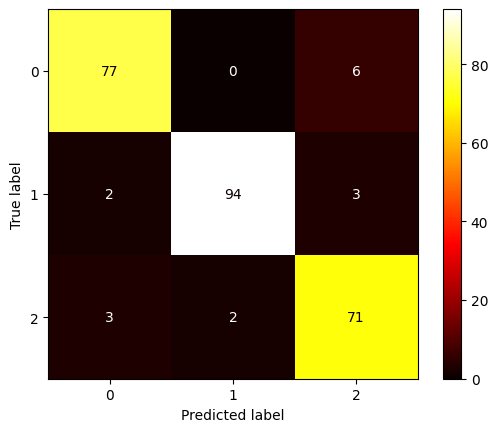

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

labels = [v for v in label2id.values()]

cm = confusion_matrix(trues, preds, labels=labels)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)
cmd.plot(cmap=plt.cm.hot, values_format='d')

for k,v in label2id.items(): print(v, k)

In [ ]:
torch.cuda.empty_cache()

データの削減

In [ ]:
# it-life-hackに該当する行番号のみ取得
index = df_title_dataset_train[df_title_dataset_train['id'] == 2].index
# 大体10分の9の削除データを指定
new_index = index[index % 5 != 0]
# 当該行を削除
df_title_dataset_train.drop(index=new_index,inplace=True)

In [ ]:
#必要であれば、同等のことをdevとtestデータにも適用
# index = df_title_dataset_dev[df_title_dataset_dev['id'] == 2].index
# new_index = index[index % 5 != 0]
# df_title_dataset_dev.drop(index=new_index,inplace=True)

# index = df_title_dataset_test[df_title_dataset_test['id'] == 2].index
# new_index = index[index % 5 != 0]
# df_title_dataset_test.drop(index=new_index,inplace=True)

In [ ]:
import sklearn
random_seed=42
df_title_dataset_train = sklearn.utils.shuffle(df_title_dataset_train, random_state=random_seed)
df_title_dataset_dev = sklearn.utils.shuffle(df_title_dataset_dev, random_state=random_seed)
df_title_dataset_test = sklearn.utils.shuffle(df_title_dataset_test, random_state=random_seed)
df_title_dataset_dev.head(20)

,id,label,title
66,0,kaden-channel,今年のベストセラーはやっぱりジョブズの伝記！ でも日本人ってこんなにジョブズ好きだったっけ？...
45,1,peachy,Twitterがキレイのお手伝い！ ハッシュタグを使って“レコーディングダイエット”
9,2,it-life-hack,おはこん、ふぉっくす紺子です！紺子グッズ第二段も進んでるよ【紺子にゅうす】
73,2,it-life-hack,ケースによっては5千円も節約！ 3G回線を使わずにWiMAXとWiFiオンリーでスマホ利用
136,0,kaden-channel,コンパスを使うのは年に１度？ iPhoneで一番不要な機能とは【話題】
104,0,kaden-channel,ぶっかけシーンに9時間！ AKB前田敦子もがんばる「最高の人生の終わり方」の今後に期待【話題】
205,0,kaden-channel,Facebookをチェックして誰のとなりに座るか決められる！ 航空会社が発表したびっくり座席...
247,2,it-life-hack,「Ubuntu One」はLinux対応 楽曲ストリーミング対応のクラウド【デジ通】
125,0,kaden-channel,食洗機がウチ飲みビールをおいしくする！—パナソニックが検証【話題】
211,0,kaden-channel,【話題】スマートフォンの満足度、トップは「Xperia arc」


In [ ]:
df_title_dataset_train['id'].value_counts(ascending=True)

2    148
1    673
0    678
Name: id, dtype: int64

In [ ]:
df_title_dataset_dev['id'].value_counts(ascending=True)

1     71
2     83
0    104
Name: id, dtype: int64

In [ ]:
df_title_dataset_test['id'].value_counts(ascending=True)

2    76
0    83
1    99
Name: id, dtype: int64

In [ ]:
!mkdir -p /content/drive/MyDrive/bert/5_1_livedoor_news/title_dataset2

In [ ]:
df_title_dataset_train.to_csv('title_dataset2/train.tsv',  columns=['id', 'label', 'title'], sep='\t', index=False)
df_title_dataset_dev.to_csv('title_dataset2/dev.tsv',  columns=['id', 'label', 'title'], sep='\t', index=False)
df_title_dataset_test.to_csv('title_dataset2/test.tsv',  columns=['id', 'label', 'title'], sep='\t', index=False)

削減データで再学習

In [ ]:
df_title_dataset_train = pd.read_csv('title_dataset2/train.tsv', sep='\t', usecols=['id', 'label', 'title'])
df_title_dataset_dev = pd.read_csv('title_dataset2/dev.tsv', sep='\t', usecols=['id', 'label', 'title'])
df_title_dataset_test = pd.read_csv('title_dataset2/test.tsv', sep='\t', usecols=['id', 'label', 'title'])

In [ ]:
d = {
    'train':Dataset.from_pandas(df_title_dataset_train.loc[:, ["title", "id"]]),
     'dev':Dataset.from_pandas(df_title_dataset_dev.loc[:, ["title", "id"]]),
     'test':Dataset.from_pandas(df_title_dataset_test.loc[:, ["title", "id"]])
     }

dataset = DatasetDict(d)
dataset.set_format("pt")

#BertForSequenceClassificationの学習時のフォーマットに変更
dataset = dataset.rename_column("title", "text")
dataset = dataset.rename_column("id", "labels")

tokenized_dataset = dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/1499 [00:00<?, ? examples/s]

Map:   0%|          | 0/258 [00:00<?, ? examples/s]

Map:   0%|          | 0/258 [00:00<?, ? examples/s]

In [ ]:
model = BertForSequenceClassification.from_pretrained(
    'cl-tohoku/bert-base-japanese-whole-word-masking',
    num_labels=len(label2id),
    id2label=id2label,
    label2id=label2id)

Some weights of the model checkpoint at cl-tohoku/bert-base-japanese-whole-word-masking were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialize

In [ ]:
batch_size=16
epoch=5
lr=1e-5
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/bert/5_1_livedoor_news/model/",
    learning_rate=lr,
    optim='adamw_torch',
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=epoch,
    evaluation_strategy="steps",
    push_to_hub=False,
    seed=random_seed,
    load_best_model_at_end=True,
    save_total_limit=1,
    save_strategy="steps"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["dev"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

Step,Training Loss,Validation Loss


TrainOutput(global_step=470, training_loss=0.2282135009765625, metrics={'train_runtime': 67.2381, 'train_samples_per_second': 111.47, 'train_steps_per_second': 6.99, 'total_flos': 142034481274266.0, 'train_loss': 0.2282135009765625, 'epoch': 5.0})

削減モデルの評価

In [ ]:
predictions = trainer.predict(tokenized_dataset["test"])
preds = np.argmax(predictions.predictions, axis=-1)
trues = dataset["test"]["labels"].to('cpu').detach().numpy().copy()

In [ ]:
print('精度　 :{:.3f}'.format(accuracy.compute(predictions=preds, references=trues)["accuracy"]))
print('適合率 :{:.3f}'.format(precision.compute(predictions=preds, references=trues, average="macro")["precision"]))
print('再現率 :{:.3f}'.format(recall.compute(predictions=preds, references=trues, average="macro")["recall"]))
print('f-1値  :{:.3f}'.format(f1.compute(predictions=preds, references=trues, average="macro")["f1"]))

精度　 :0.888
適合率 :0.891
再現率 :0.878
f-1値  :0.880


0 kaden-channel
1 peachy
2 it-life-hack


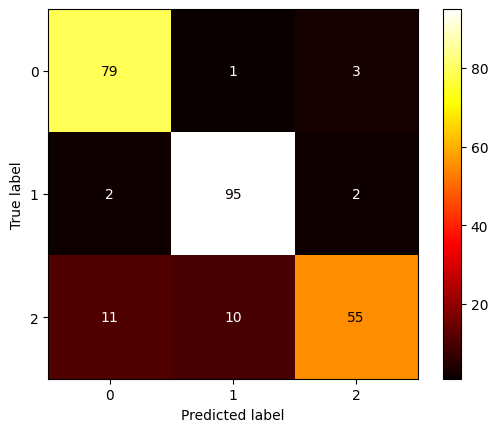

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

labels = [v for v in label2id.values()]

cm = confusion_matrix(trues, preds, labels=labels)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)
cmd.plot(cmap=plt.cm.hot, values_format='d')

for k,v in label2id.items(): print(v, k)

データ拡張以降は別のノートブック(ch07_02_augmentation.ipynb)で実行